In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
def plot_static(poro, perm, well_loc, ncols, multiplier, cmaps=['jet','jet'], figsize=(15,5)):
    logpermx = np.log10(perm[:,:,0])
    fig, axs = plt.subplots(2, ncols, figsize=figsize, facecolor='white')
    for j in range(ncols):
        k = j*multiplier
        im0 = axs[0,j].imshow(poro, cmap=cmaps[0])
        im1 = axs[1,j].imshow(logpermx, cmap=cmaps[1])
        axs[0,j].set(title='Realization {}'.format(k))
        for i in range(2):
            axs[i,j].scatter(well_loc[k][0], well_loc[k][1], c='k', marker='o')
            axs[i,j].set(xticks=[], yticks=[])
    axs[0,0].set(ylabel='Porosity'); axs[1,0].set(ylabel='LogPerm_x') 
    plt.colorbar(im0, label='$\phi$ [v/v]'); plt.colorbar(im1, label='$log(k_x)$ [log-mD]')

def plot_dynamic(data, well_loc, ncols, multiplier, cmap='jet', figsize=(18,4), title='Dynamic'):
    j_timesteps = np.insert(np.linspace(0, 60, 13, dtype='int')[1:]-1, 0, 0)
    k = 0 
    fig, axs = plt.subplots(ncols, 13, figsize=figsize)
    plt.suptitle(title)
    for i in range(ncols):
        for j in range(13):
            axs[i,j].imshow(data[k,:,:,j_timesteps[j]], cmap=cmap)
            axs[i,j].scatter(well_loc[k][0], well_loc[k][1], c='k', marker='o')
            axs[0,j].set(title='t={}'.format(j_timesteps[j]+1))
            axs[i,0].set(ylabel='n={}'.format(k))
            axs[i,j].set(xticks=[], yticks=[])
        k += multiplier

***

In [4]:
nx, ny, nt, nR = 32, 32, 60, 100
logperm    = np.array(pd.read_csv('simulations/perm_realization.csv'))
perm       = loadmat('data_mat/permeability.mat')['permeability'].reshape(nx,ny,3)
poro       = loadmat('data_mat/porosity.mat')['poro'].reshape(nx,ny)
timesteps  = loadmat('data_mat/time_yr.mat')['cum_time']
bhp        = loadmat('data_mat/bhp.mat')['bhp']
pressure   = loadmat('data_mat/pressure.mat')['pressure'].reshape(nR,nx,ny,nt)
saturation = loadmat('data_mat/saturation.mat')['saturation'].reshape(nR,nx,ny,nt)

well_locs  = loadmat('data_mat/well_locations.mat')['well_locations']
well_locs_mask = np.zeros((nR,nx,ny))
for i in range(nR):
    well_locs_mask[i, well_locs[i][0], well_locs[i][1]] = 1

np.save('data_npy/timesteps.npy', timesteps); np.save('data_npy/bhp.npy', bhp)
np.save('data_npy/well_locs.npy', well_locs); np.save('data_npy/well_locs_mask.npy', well_locs_mask)
np.save('data_npy/poro.npy', poro);           np.save('data_npy/perm.npy', perm)
np.save('data_npy/pressure.npy', pressure);   np.save('data_npy/saturation.npy', saturation)

print('Permeability: {} | Porosity: {}'.format(perm.shape, poro.shape))
print('Pressure: {} | Saturation: {}'.format(pressure.shape, saturation.shape))
print('Timesteps: {} | BHP: {}'.format(timesteps.shape, bhp.shape))
print('Well Locations: {} | Well Locations MASK: {}'.format(well_locs.shape, well_locs_mask.shape))

Permeability: (32, 32, 3) | Porosity: (32, 32)
Pressure: (100, 32, 32, 60) | Saturation: (100, 32, 32, 60)
Timesteps: (60, 1) | BHP: (100, 60)
Well Locations: (100, 2) | Well Locations MASK: (100, 32, 32)


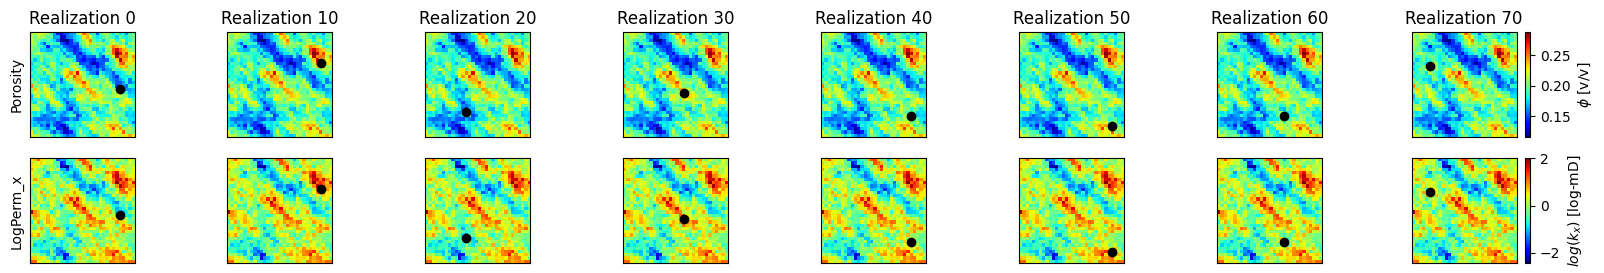

In [46]:
plot_static(poro, perm, well_locs, 8, 10, figsize=(20,3))

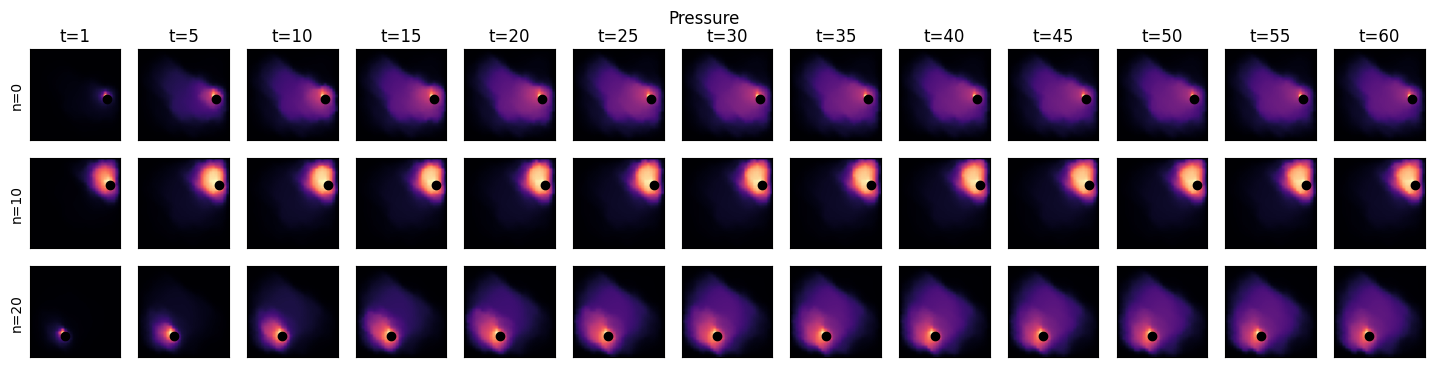

In [60]:
plot_dynamic(pressure, well_locs, ncols=3, multiplier=10, cmap='magma', title='Pressure')

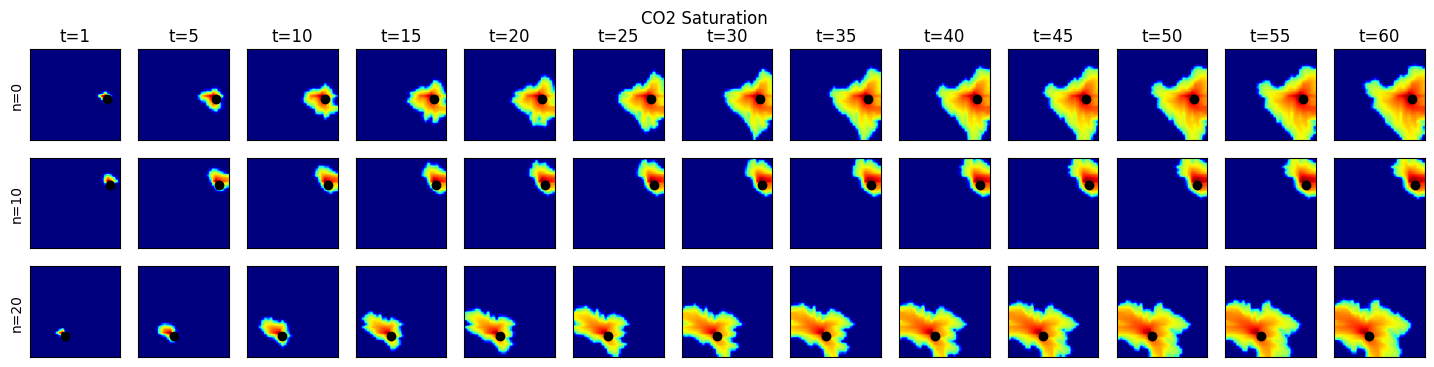

In [62]:
plot_dynamic(saturation, well_locs, ncols=3, multiplier=10, cmap='jet', title='CO2 Saturation')